In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pickle

## Plot optimal actions

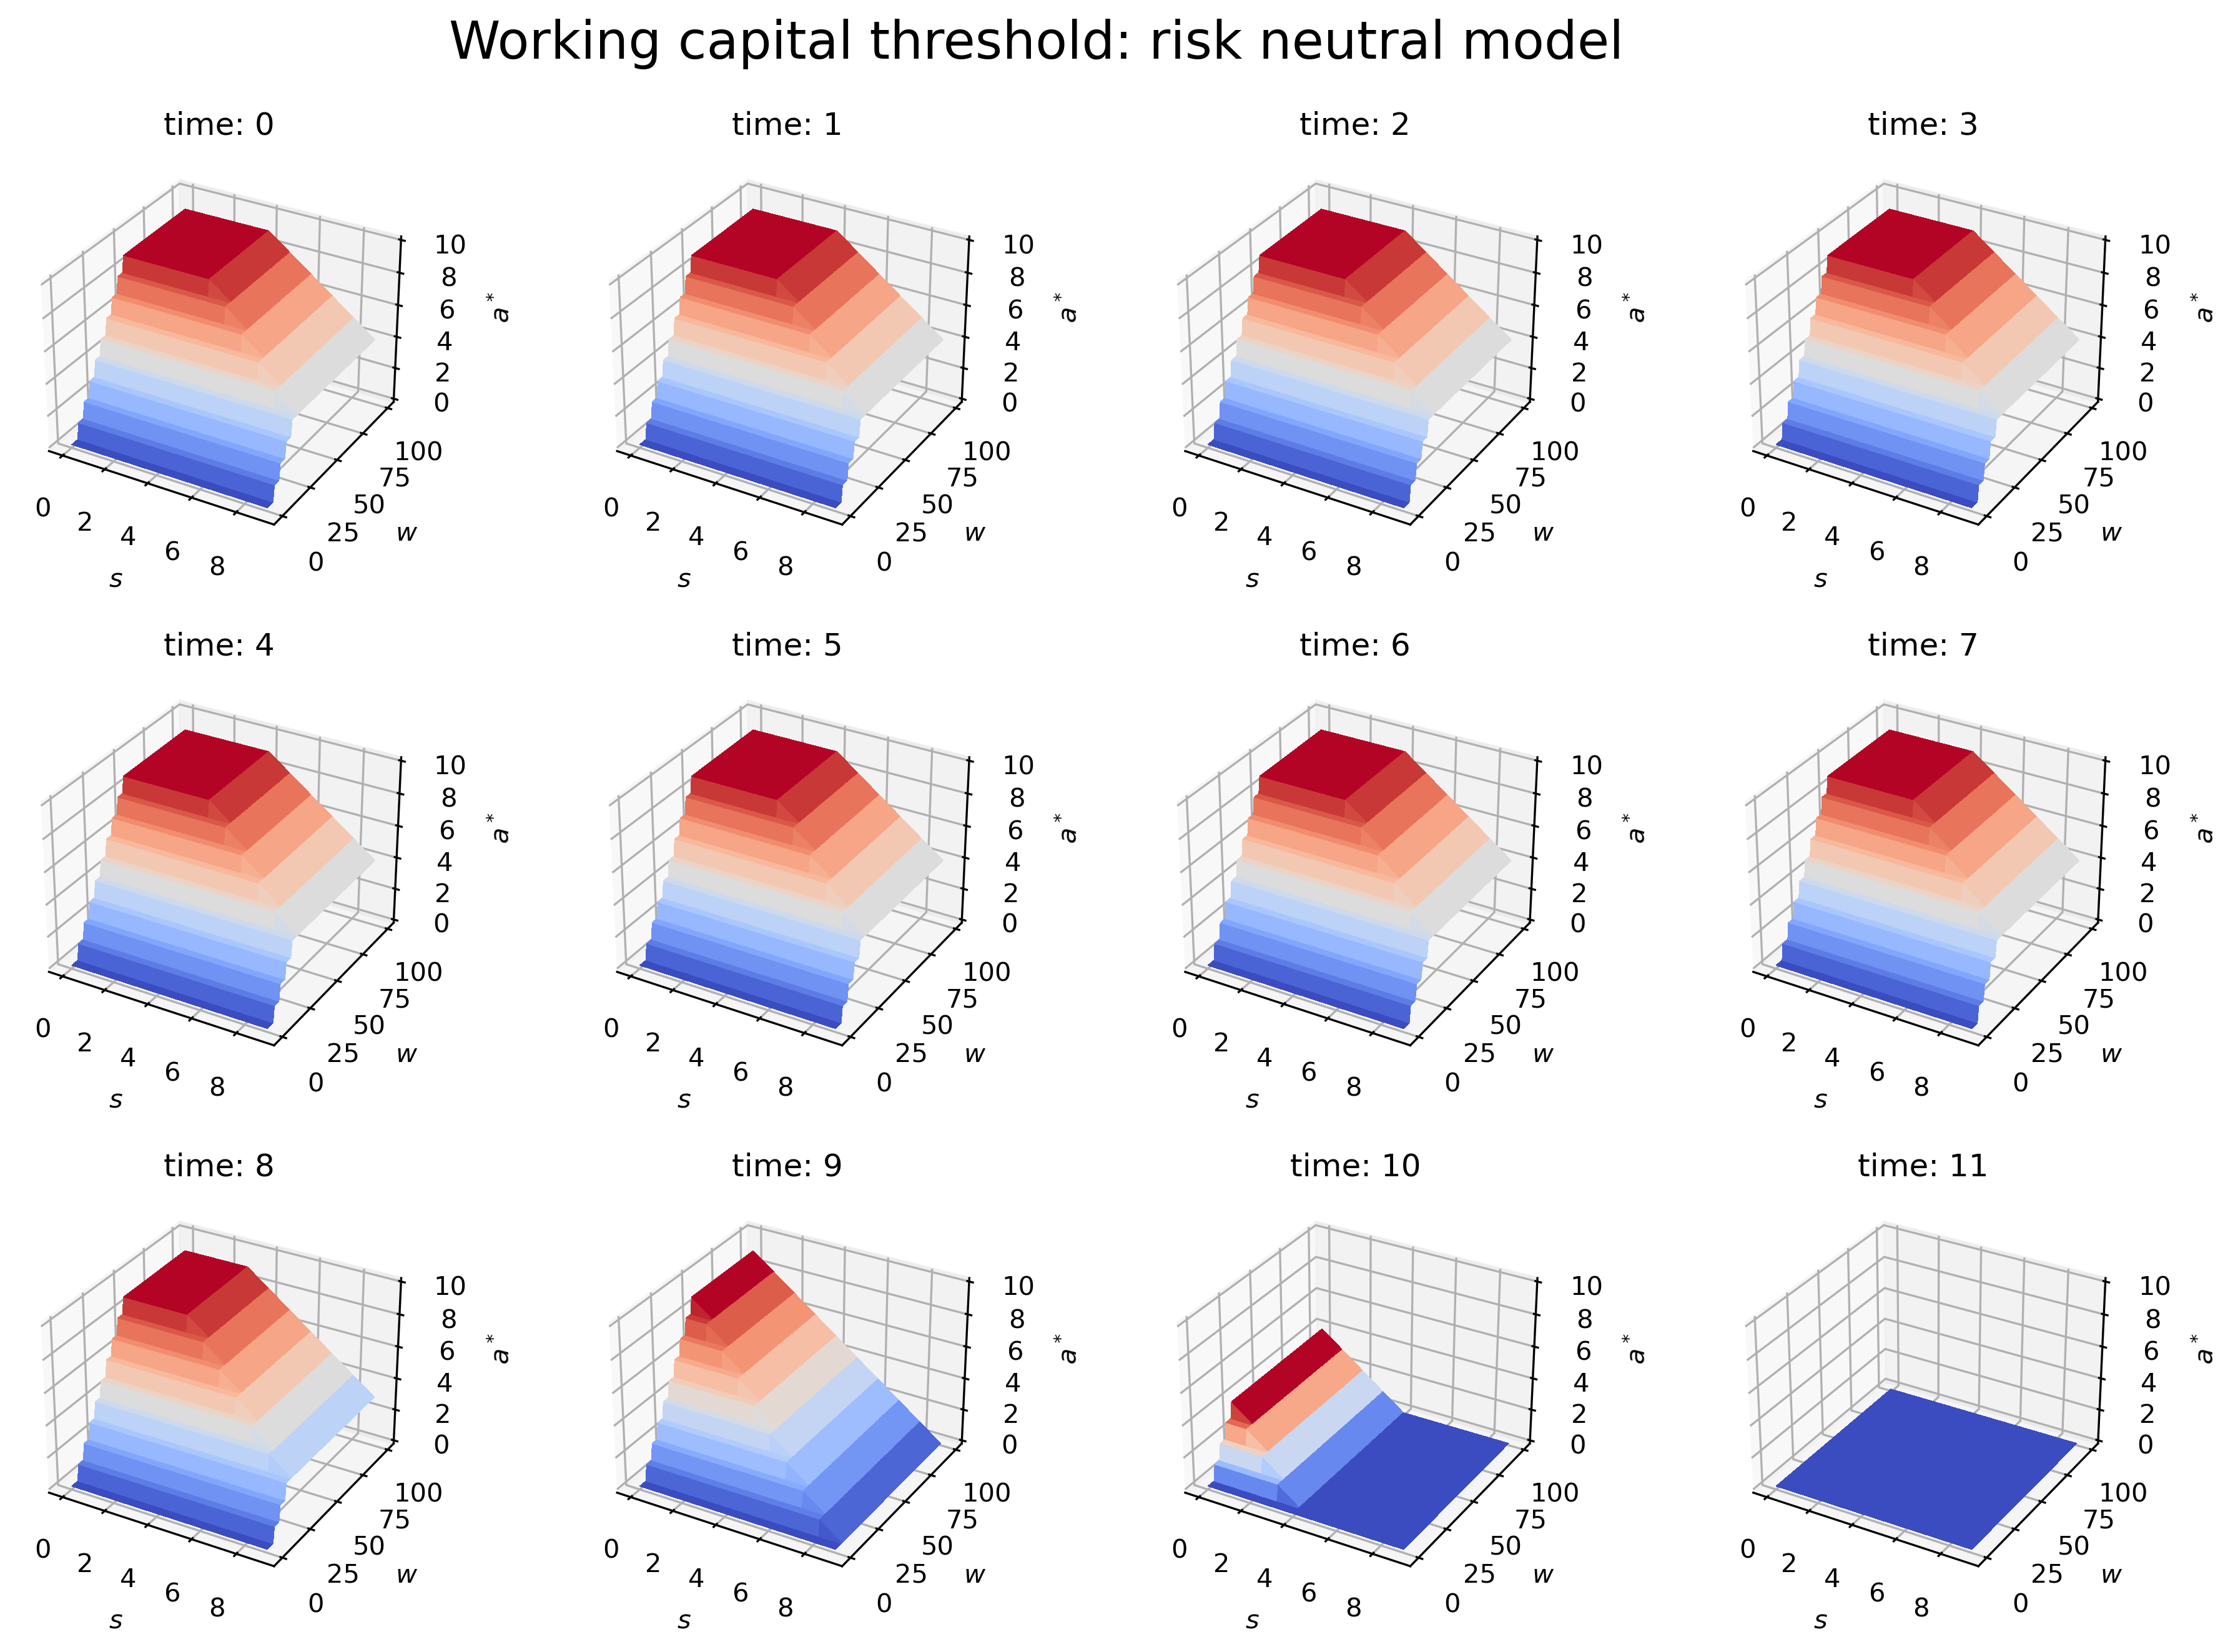

In [2]:

with open(f'results/working_capital_neutral.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('$s$')
    ax.set_ylabel('$w$')
    ax.set_zlabel(r'$a^*$')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Working capital threshold: risk neutral model', y=0.95, fontsize=20)
fig.subplots_adjust(hspace=0.3)
plt.show()

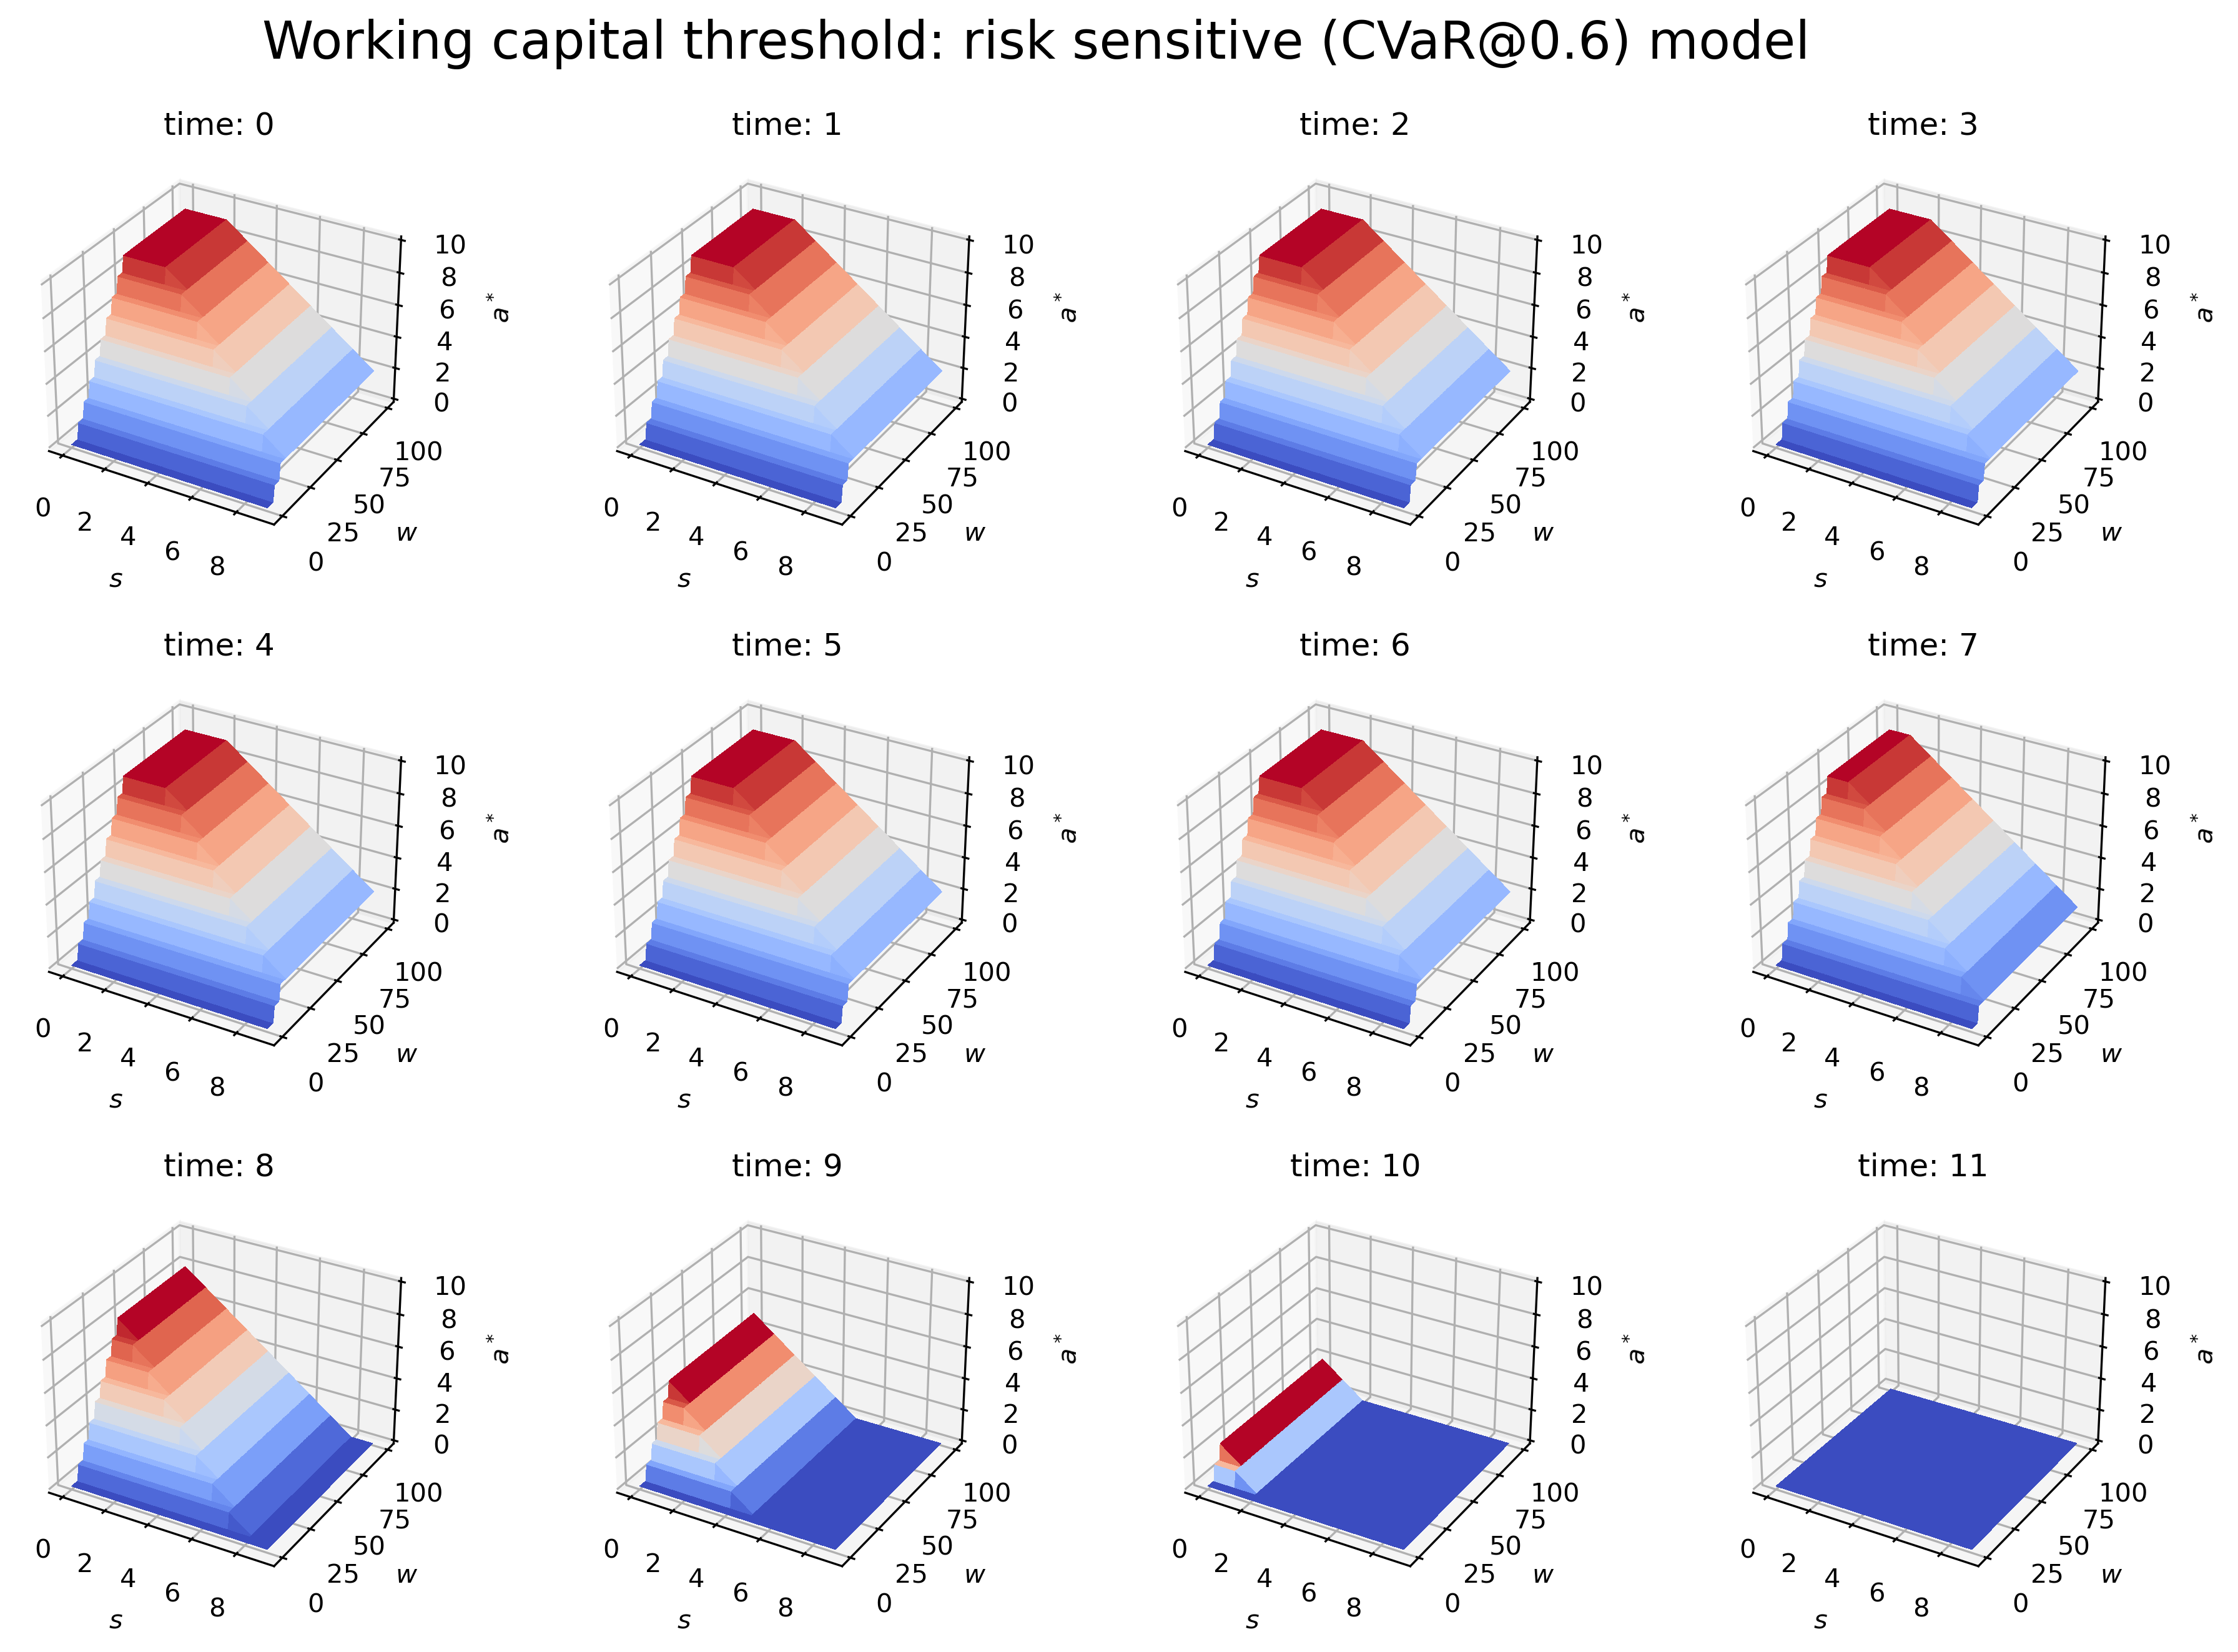

In [3]:
with open(f'results/working_capital_CVaR.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('$s$')
    ax.set_ylabel('$w$')
    ax.set_zlabel(r'$a^*$')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Working capital threshold: risk sensitive (CVaR@0.6) model', y=0.95, fontsize=20)
fig.subplots_adjust(hspace=0.3)
plt.show()

# Cash orders only

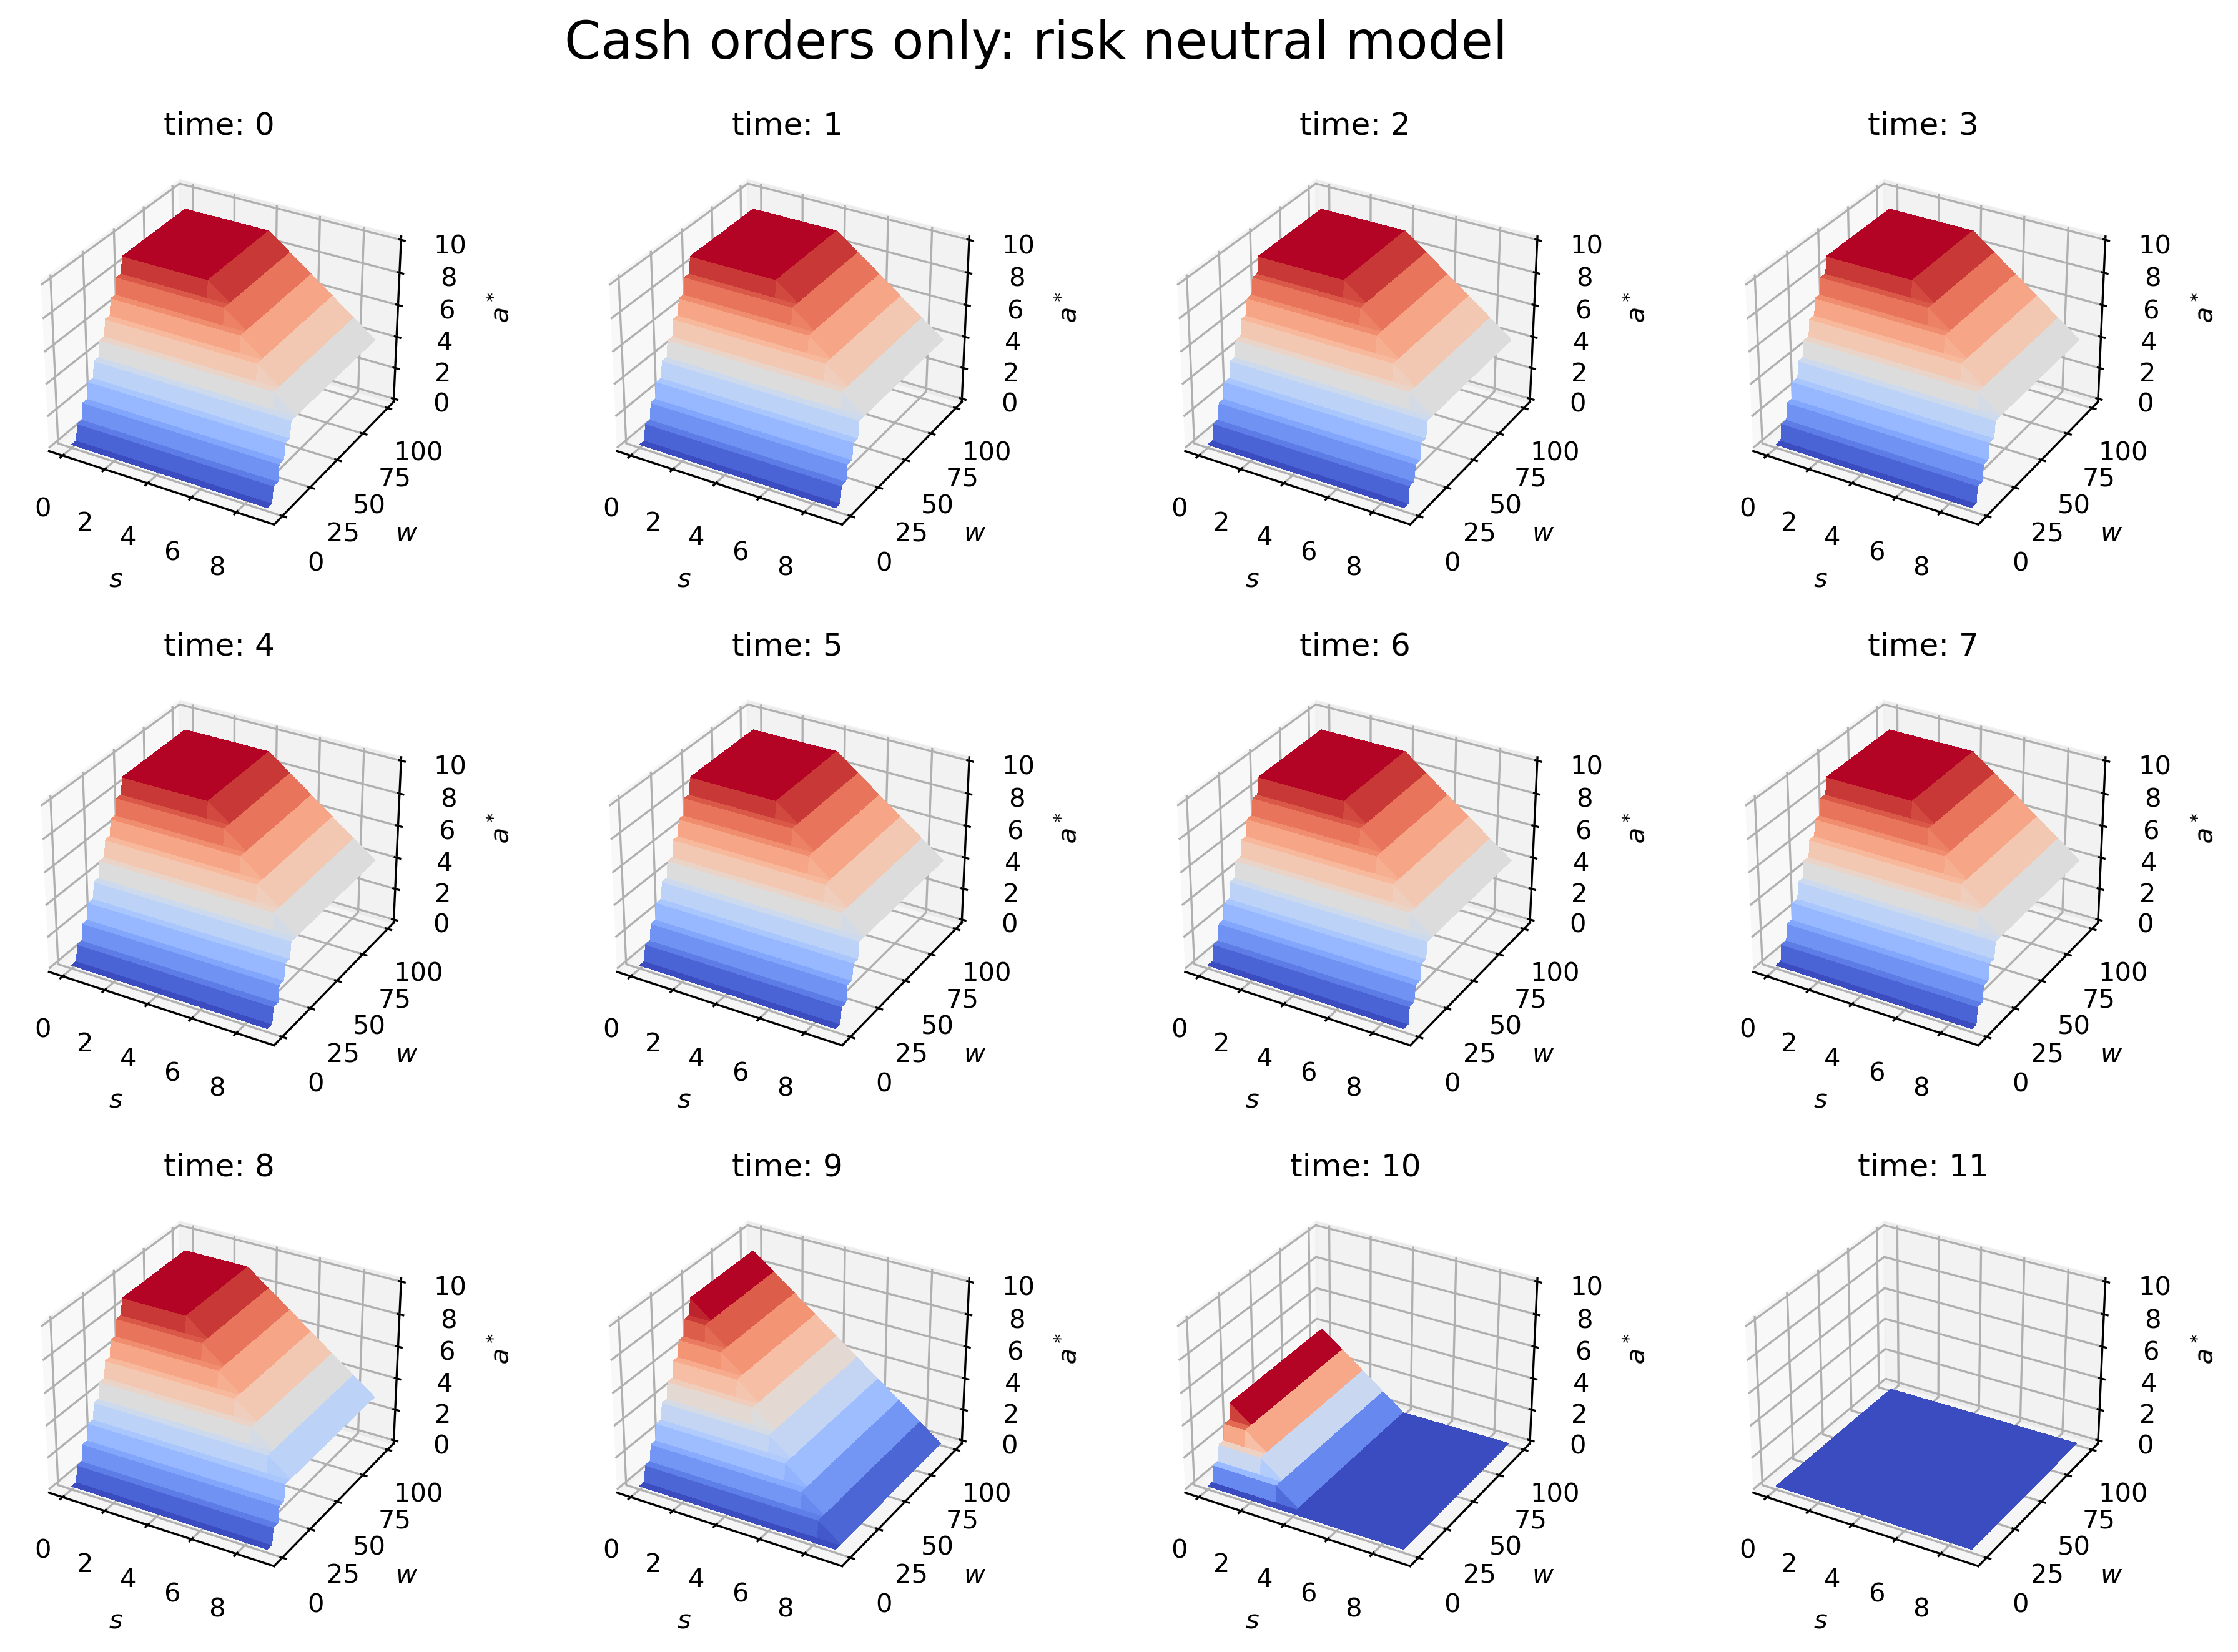

In [4]:

with open(f'results/cash_order_neutral.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel(r'$s$')
    ax.set_ylabel(r'$w$')
    ax.set_zlabel(r'$a^*$')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Cash orders only: risk neutral model', y=0.95, fontsize=20)
fig.subplots_adjust(hspace=0.3)
plt.show()

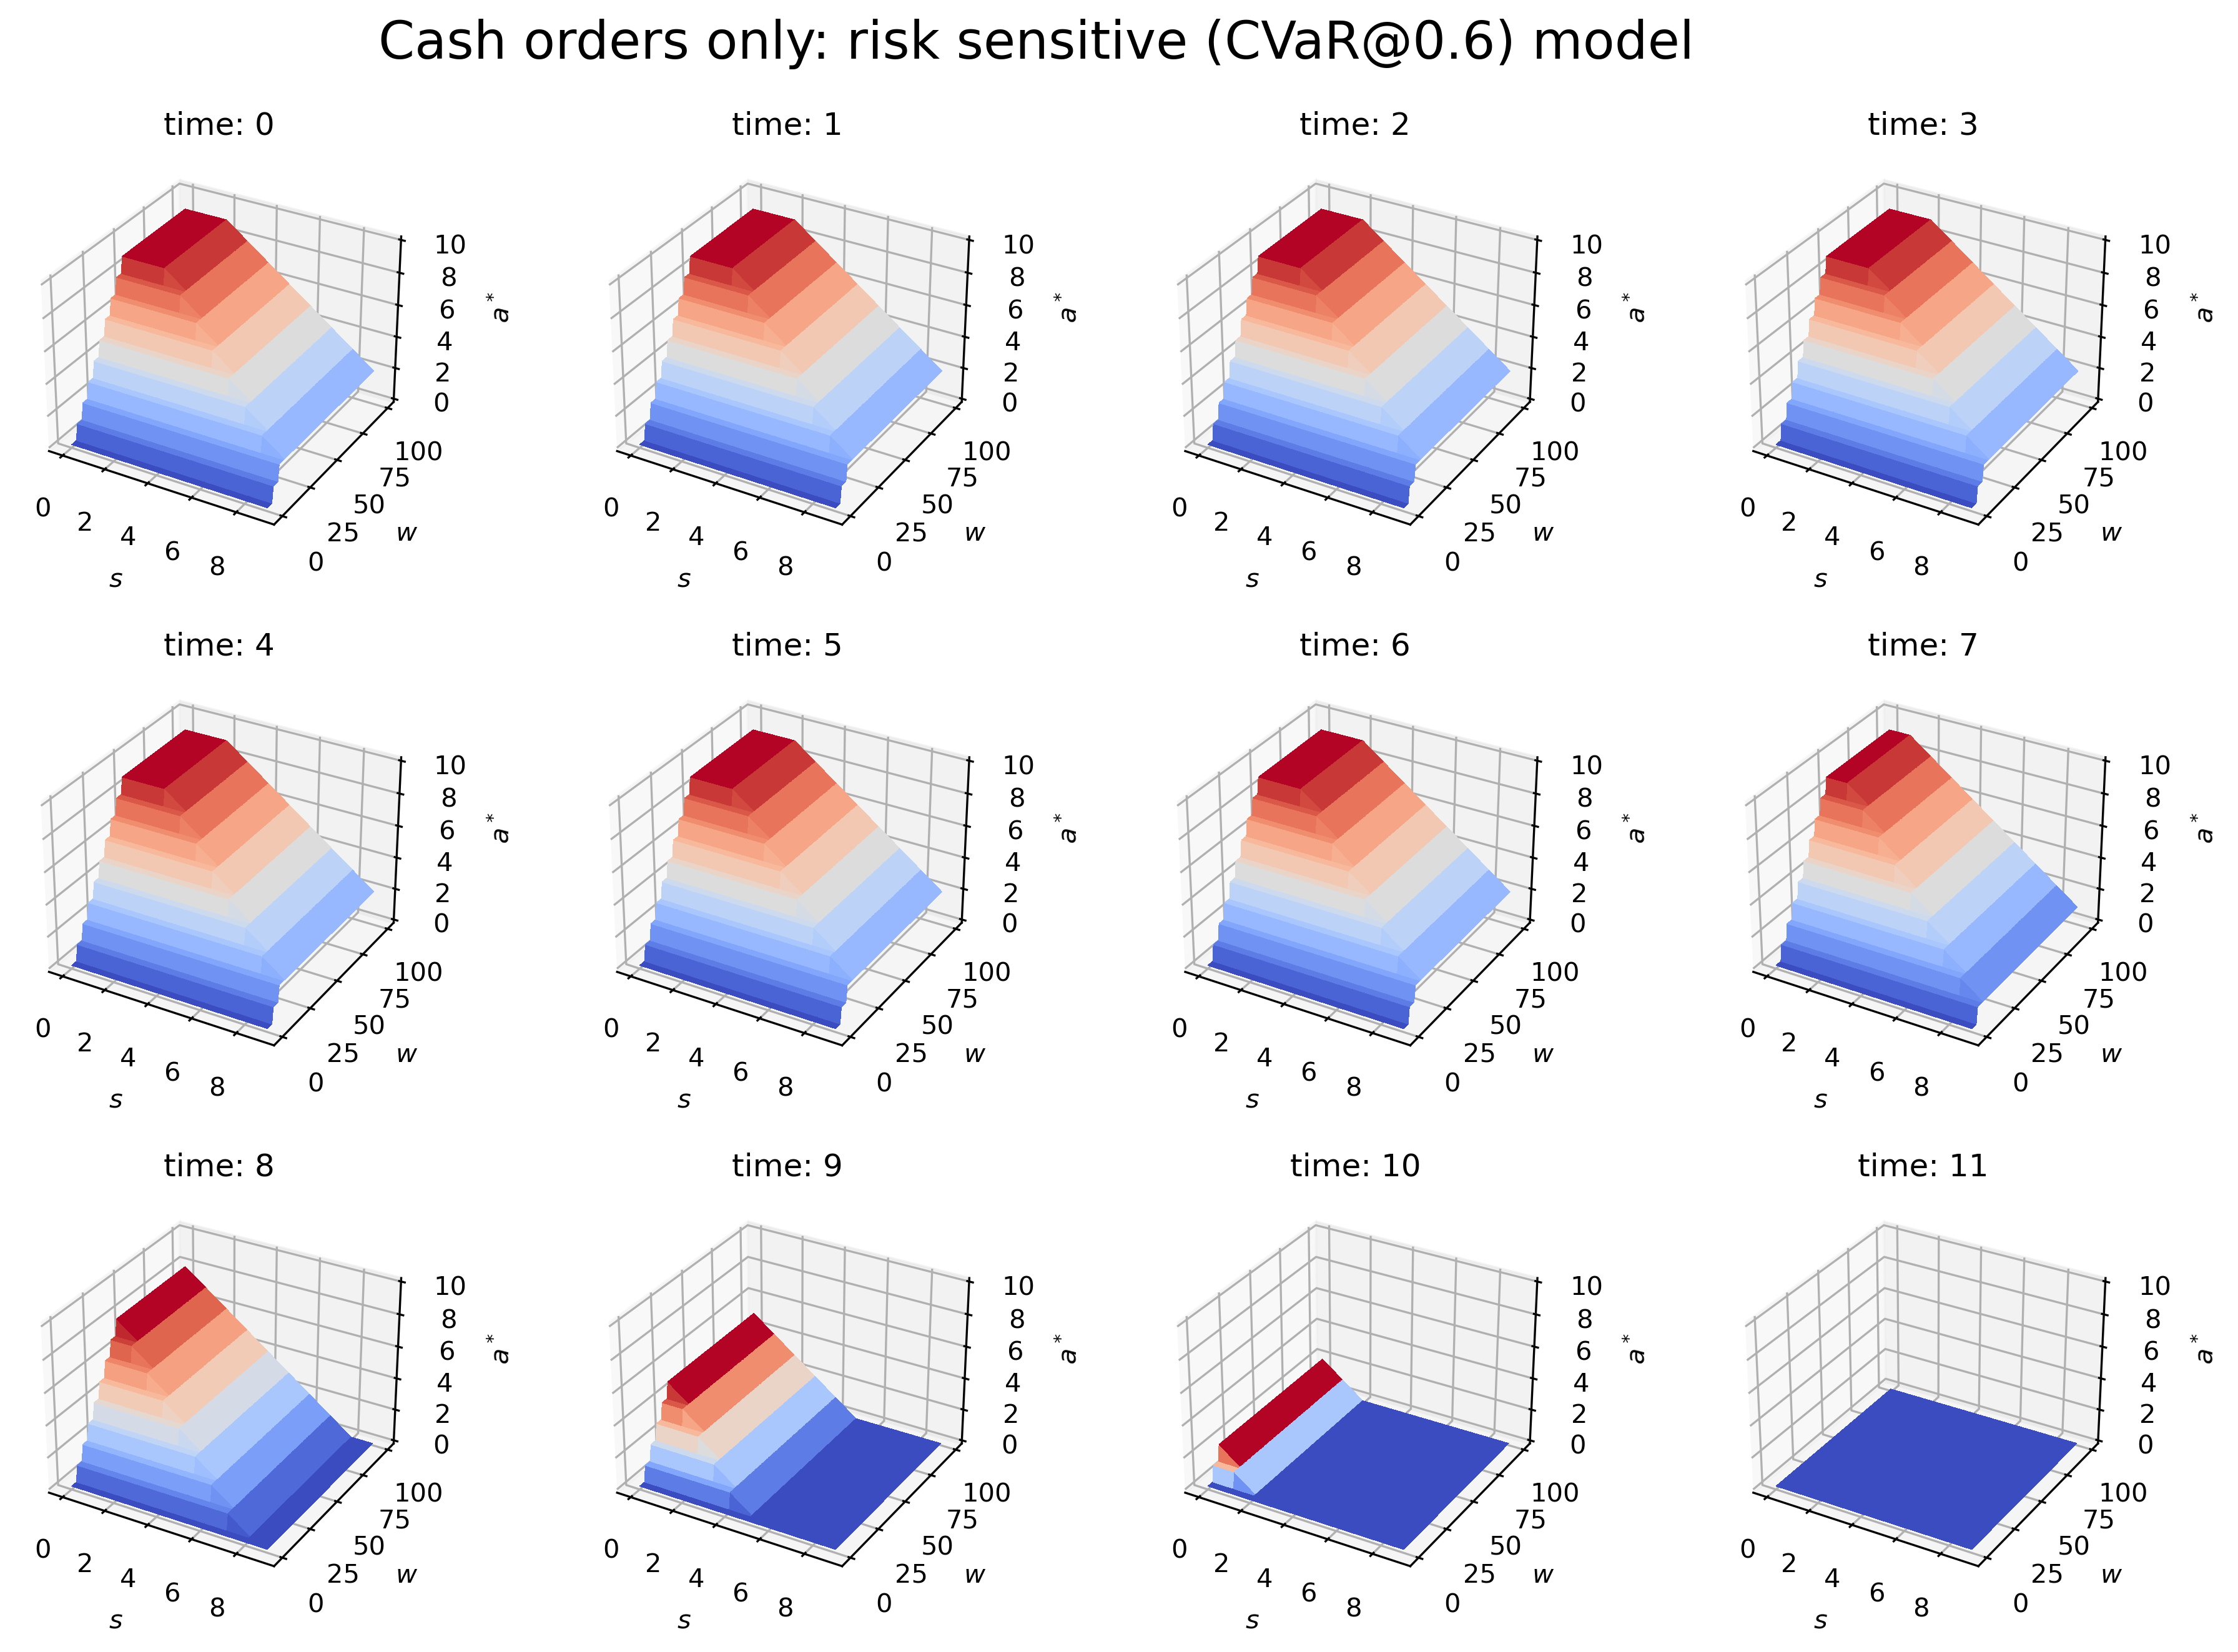

In [5]:

with open(f'results/cash_order_CVaR.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel(r'$s$')
    ax.set_ylabel(r'$w$')
    ax.set_zlabel(r'$a^*$')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Cash orders only: risk sensitive (CVaR@0.6) model', y=0.95, fontsize=20)
fig.subplots_adjust(hspace=0.3)
plt.show()

## Plot trajectory

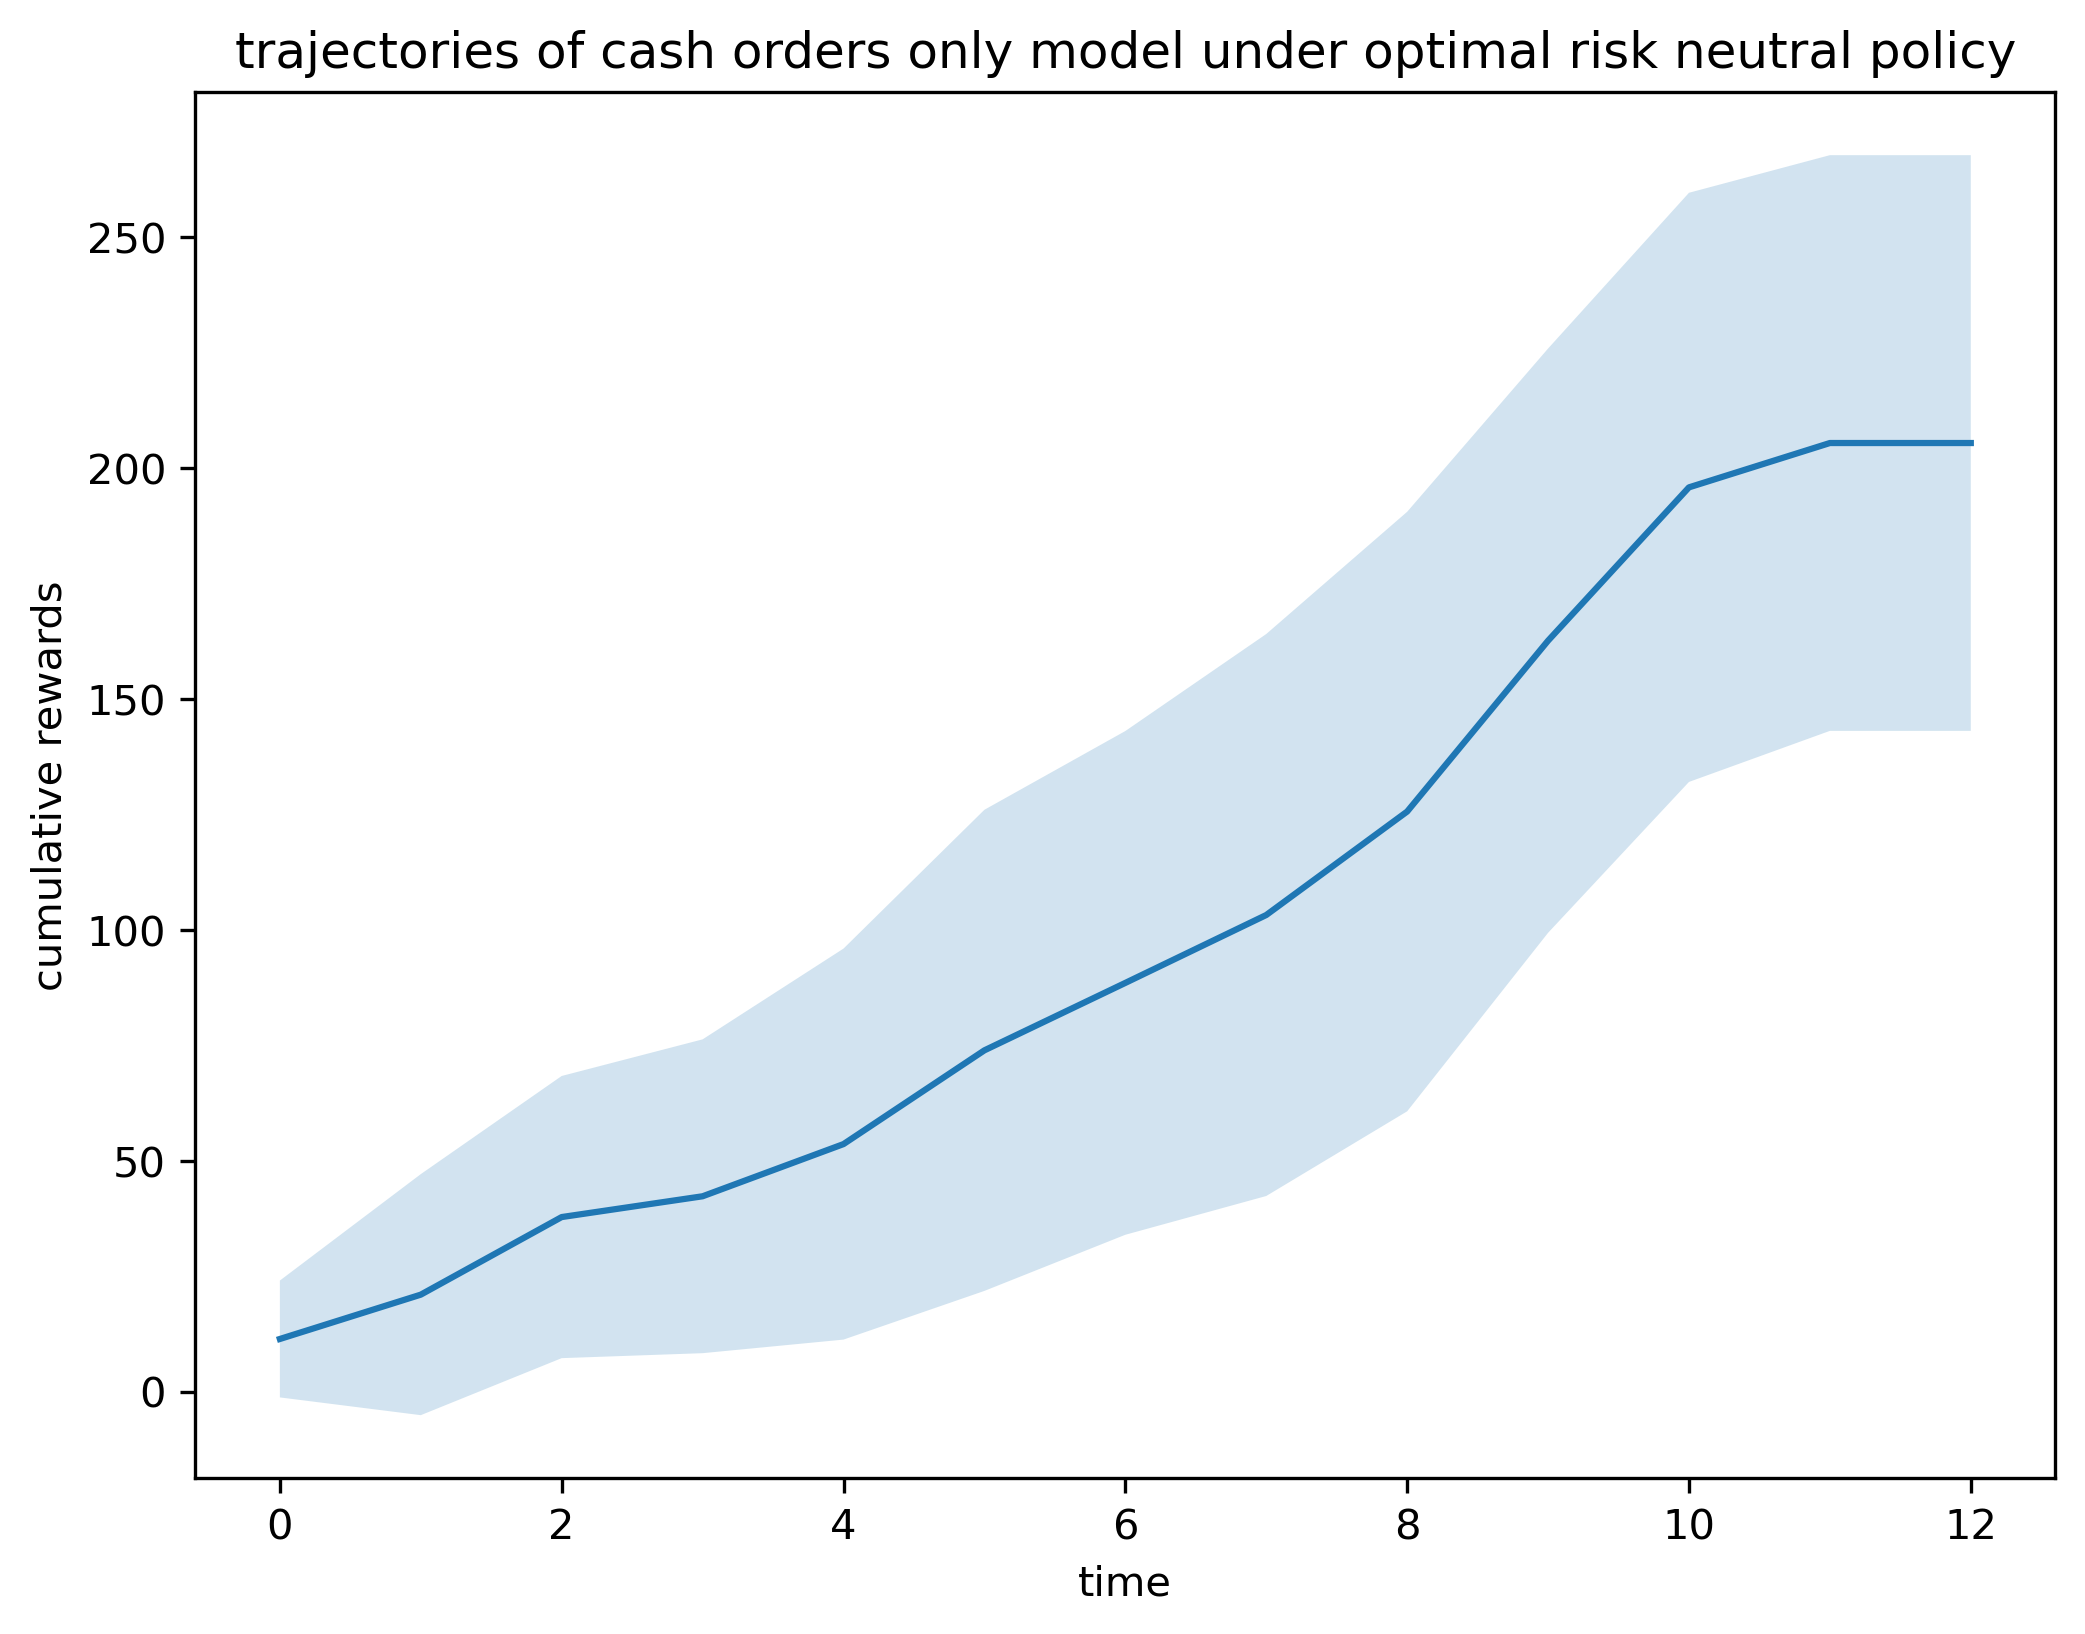

In [6]:

with open(f'results/trj_cash_order_neutral.pkl', 'rb') as pk:
    trj_list = pickle.load(pk)

fig, ax = plt.subplots(figsize=(8,6), dpi=300)    
trajectories = np.zeros(shape=(len(trj_list), len(trj_list[0]['state'])))
for i,trj in enumerate(trj_list):
    trajectories[i] = trj['reward'].cumsum()
# ax.plot(trajectories.T, alpha=0.1)


trj_std = trajectories.std(axis=0)
trj_mean = trajectories.mean(axis=0)
t_step = np.arange(len(trj_list[0]['state']))
ax.plot(t_step, trj_mean, label='mean')
ax.fill_between(t_step, trj_mean+trj_std, trj_mean-trj_std, alpha=0.2)

ax.set_xlabel('time')
ax.set_ylabel('cumulative rewards')
ax.set_title('trajectories of cash orders only model under optimal risk neutral policy')
plt.show()

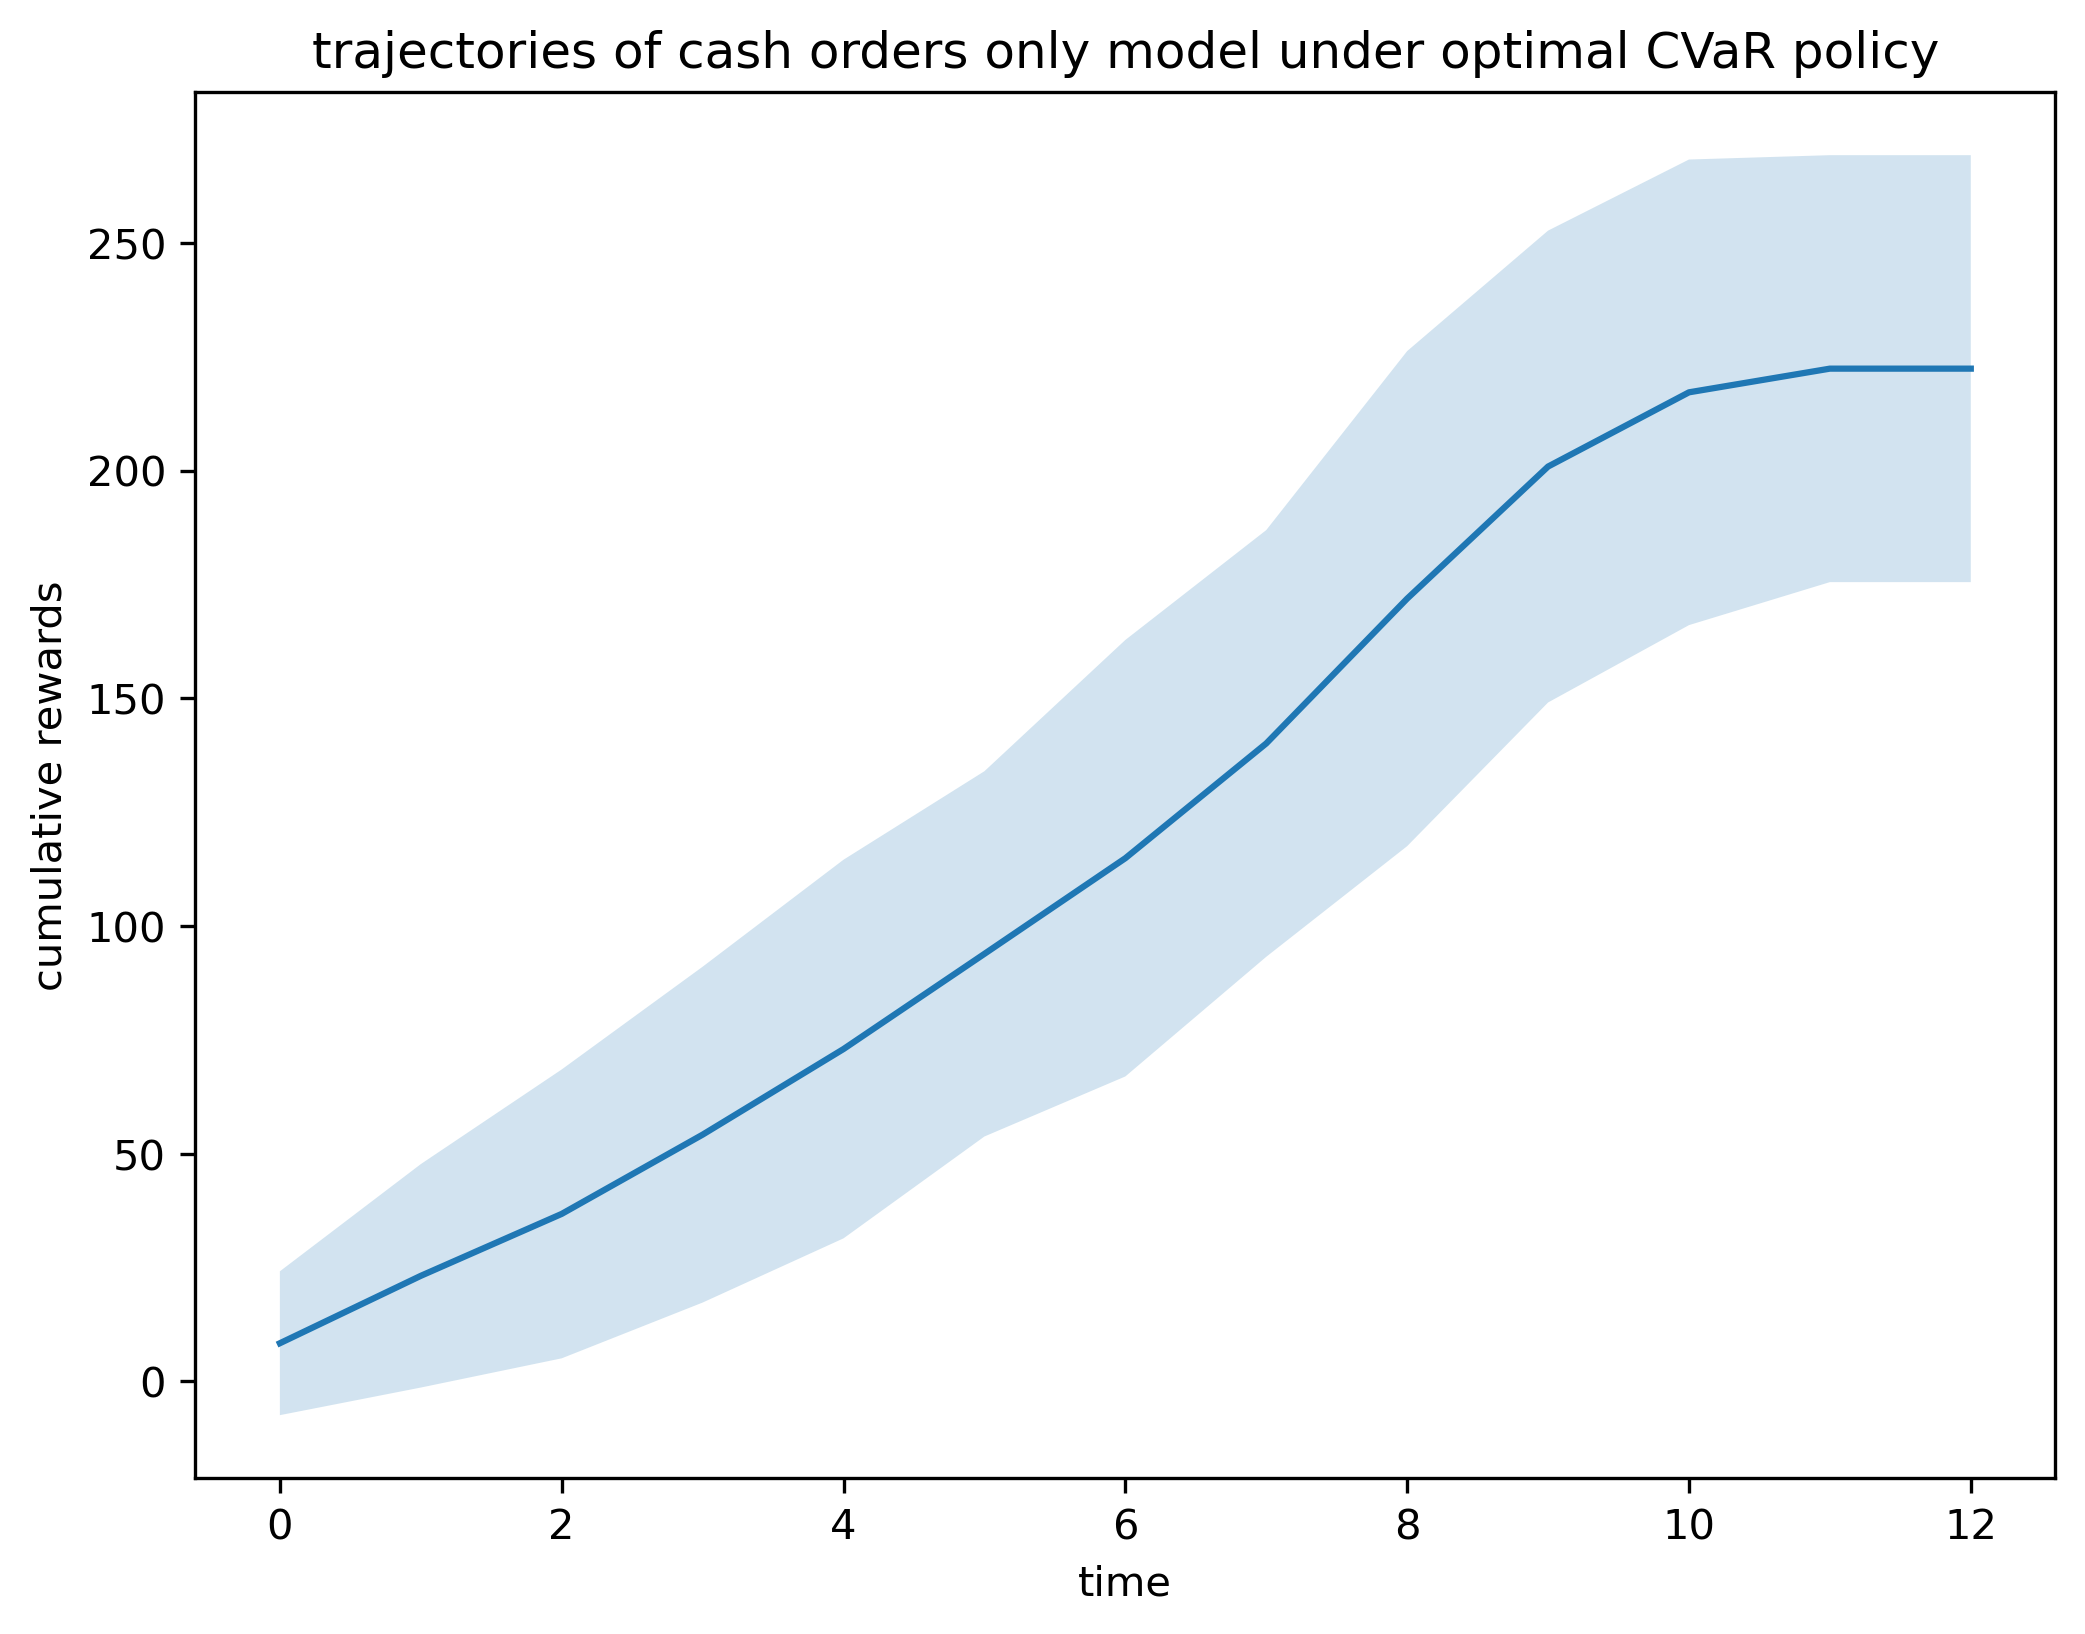

In [7]:
with open(f'results/trj_cash_order_CVaR.pkl', 'rb') as pk:
    trj_list = pickle.load(pk)
  
fig, ax = plt.subplots(figsize=(8,6), dpi=300)    
trajectories = np.zeros(shape=(len(trj_list), len(trj_list[0]['state'])))
for i,trj in enumerate(trj_list):
    trajectories[i] = trj['reward'].cumsum()
# ax.plot(trajectories.T, alpha=0.1)


trj_std = trajectories.std(axis=0)
trj_mean = trajectories.mean(axis=0)
t_step = np.arange(len(trj_list[0]['state']))
ax.plot(t_step, trj_mean, label='mean')
ax.fill_between(t_step, trj_mean+trj_std, trj_mean-trj_std, alpha=0.2)

ax.set_xlabel('time')
ax.set_ylabel('cumulative rewards')
ax.set_title('trajectories of cash orders only model under optimal CVaR policy')
plt.show()

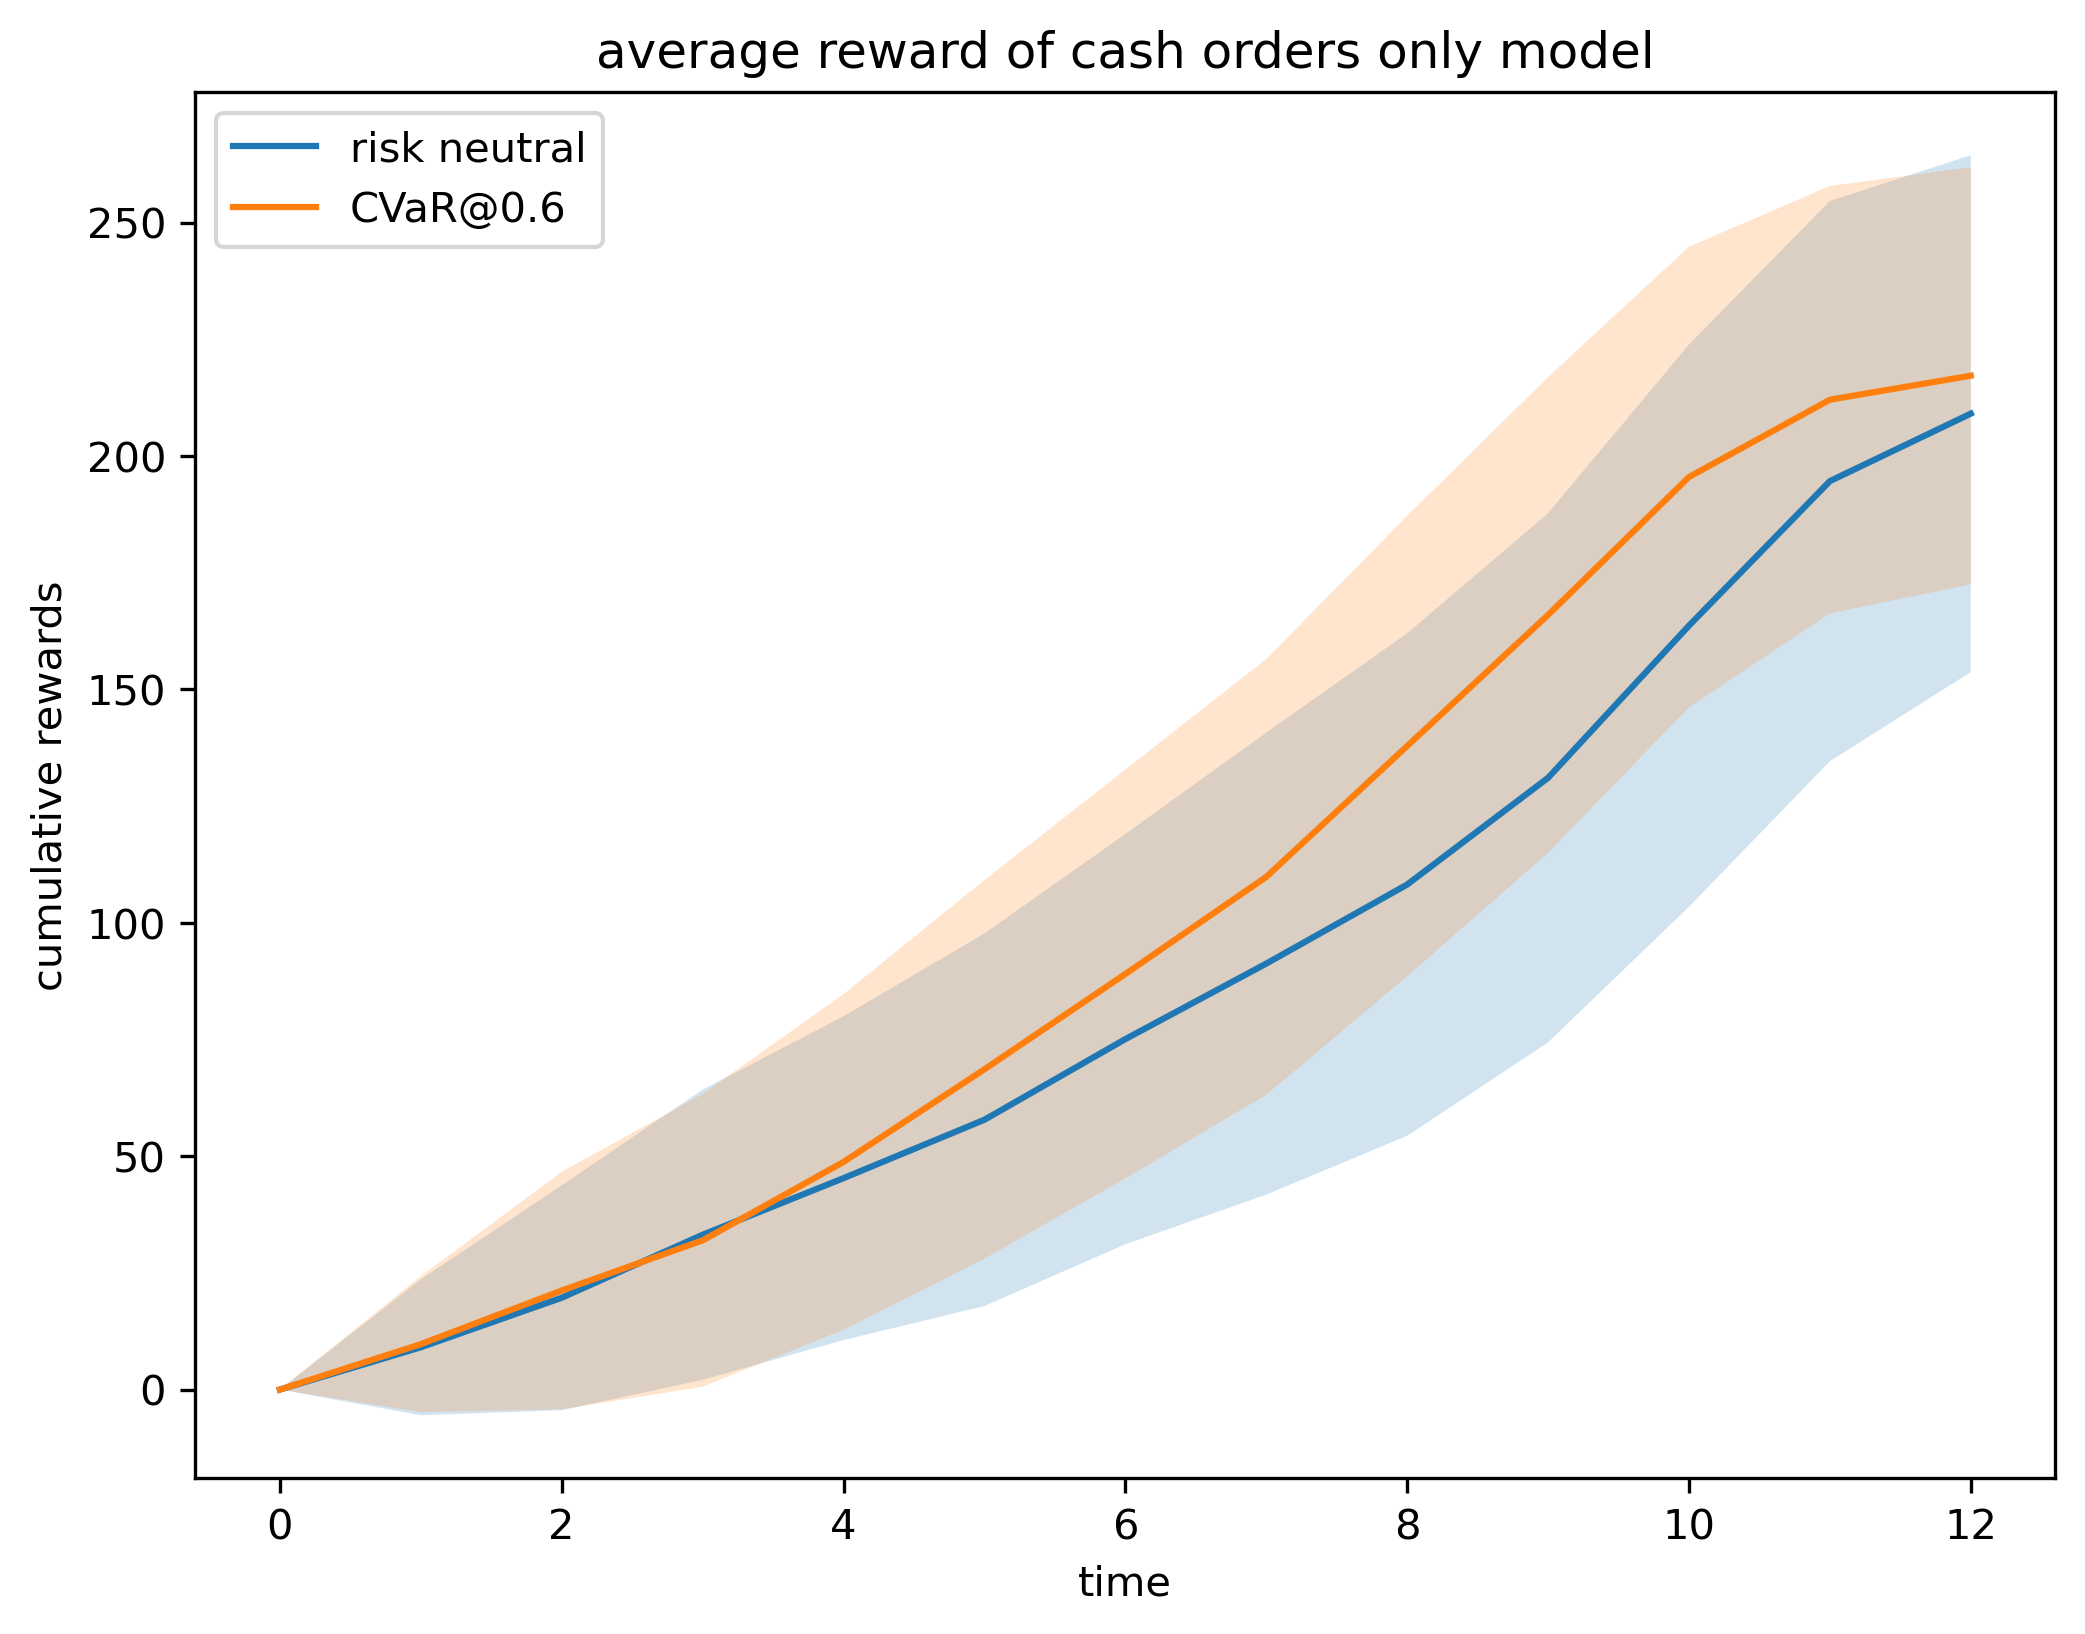

In [27]:

with open(f'results/trj_cash_order_neutral.pkl', 'rb') as pk:
    trj_list = pickle.load(pk)

fig, ax = plt.subplots(figsize=(8,6), dpi=300)    
trajectories = np.zeros(shape=(len(trj_list), len(trj_list[0]['state'])))
for i,trj in enumerate(trj_list):
    # add initial 0
    trj['reward'] = np.insert(trj['reward'], 0, 0)
    trajectories[i] = trj['reward'][:-1].cumsum()


trj_std = trajectories.std(axis=0)
trj_mean = trajectories.mean(axis=0)
t_step = np.arange(len(trj_list[0]['state']))
ax.plot(t_step, trj_mean, label='risk neutral')
ax.fill_between(t_step, trj_mean+trj_std, trj_mean-trj_std, alpha=0.2)



with open(f'results/trj_cash_order_CVaR.pkl', 'rb') as pk:
    trj_list = pickle.load(pk)
  
  
trajectories = np.zeros(shape=(len(trj_list), len(trj_list[0]['state'])))
for i,trj in enumerate(trj_list):
    trj['reward'] = np.insert(trj['reward'], 0, 0)
    trajectories[i] = trj['reward'][:-1].cumsum()
# ax.plot(trajectories.T, alpha=0.1)


trj_std = trajectories.std(axis=0)
trj_mean = trajectories.mean(axis=0)
t_step = np.arange(len(trj_list[0]['state']))
ax.plot(t_step, trj_mean, label='CVaR@0.6')
ax.fill_between(t_step, trj_mean+trj_std, trj_mean-trj_std, alpha=0.2)

ax.set_xlabel('time')
ax.set_ylabel('cumulative rewards')
ax.set_title('Cumulative reward of cash orders only model')
ax.legend(loc='upper left')
plt.show()